# Uncomputation

In [2]:
%matplotlib inline
from qiskit import *

To compute $a \wedge b \wedge c$, we need two working qubits. We need to split the computation into two parts: $a \wedge b \wedge c = (a \wedge b) \wedge c$

Moreover, it is good practice to clean the working qubit that only contains an intermediate result: that is called uncomputation

In [10]:
circuit = QuantumCircuit(5, 2)

In [11]:
# Steps to change qubits to 1 for test purposes
_ = circuit.x(0)
_ = circuit.x(1)
_ = circuit.x(2)
_ = circuit.barrier()

Firstly, we calculate $a \wedge b$ in the first working qubit.

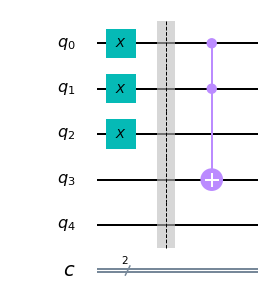

In [12]:
_ = circuit.ccx(0, 1, 3)
circuit.draw(output="mpl")

Secondly, we calculate $(a \wedge b) \wedge c$ using both the third qubit and the first working qubit. The second working qubit is the target.

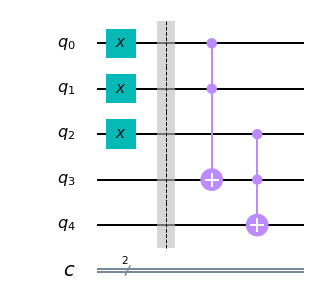

In [13]:
_ = circuit.ccx(2, 3, 4)
circuit.draw(output="mpl")

We now uncompute $a \wedge b$ in the first working qubit. That way, we can reuse it later if needed.

To do so, we remember that the Toffoli gate is the inverse of itself: $(a \wedge b) \oplus (a \wedge b) = 0$

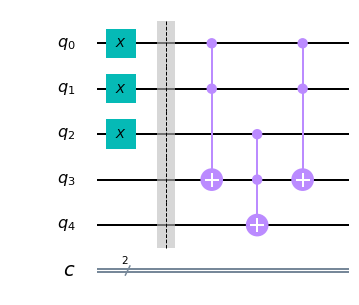

In [14]:
_ = circuit.ccx(0, 1, 3)
circuit.draw(output="mpl")

Lastly, we measure both working qubits: one should contain the AND and the other should always be zero

In [15]:
# Measure (x^y^z) and working qubuit in classical bit
_ = circuit.barrier()
_ = circuit.measure(4, 0)
_ = circuit.measure(3, 1)

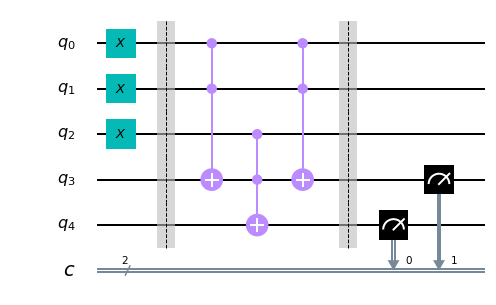

In [16]:
circuit.draw(output="mpl")

In [17]:
# Simulate
simulator = Aer.get_backend("qasm_simulator")
job = execute(circuit, backend=simulator, shots=1024)
result = job.result()
counts = result.get_counts()

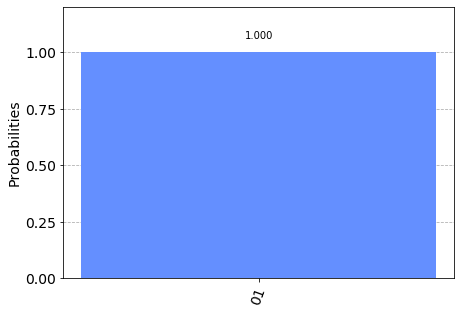

In [18]:
# Plot results
visualization.plot_histogram(counts)